In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Name of the CSV file
file = './landfilldata.csv'

#Pull in the landfill data into a dataframe
landfill_df= pd.read_csv(file)

In [3]:
#drop rows with null values
landfill_df = landfill_df.dropna()
landfill_df.drop(landfill_df.loc[landfill_df['State']=="PR"].index, inplace=True)

county_df = landfill_df.drop_duplicates(subset="County", keep="first")

In [4]:
#Create a dataframe that is only one county entry
county_df = county_df[['Landfill Name','State','County']]
output_data_file = "./county_names.csv"
county_df.to_csv(output_data_file)

In [5]:
#Create a dataframe that is only LANDFILL ADDRESS only
address_df = landfill_df[['Landfill Name', 'Physical Address', 'City', 
                          'State','County', 'Zip Code', 'Latitude', 'Longitude',]]
output_data_file = "./landfill_address.csv"
address_df.to_csv(output_data_file)

In [6]:
Georgia_df = address_df.loc[address_df["State"]=="GA"]
Georgia_df = Georgia_df[['Landfill Name', 'State','County',]]

output_data_file = "./Georgia_trash.csv"

Georgia_df.to_csv(output_data_file)

In [7]:
#Create a dataframe that is LANDFILL STATUS
status_df = landfill_df[['Landfill Name', 'State','Ownership Type','Current Landfill Status']]
status_df

,Landfill Name,State,Ownership Type,Current Landfill Status
0,Anchorage Regional Landfill,AK,Public,Open
1,Capitol Disposal Landfill,AK,Private,Open
2,Central Peninsula Landfill (CPL),AK,Public,Open
4,Merrill Field Landfill,AK,Public,Closed
5,Palmer Central Landfill,AK,Public,Open
...,...,...,...,...
2624,Campbell County Landfill No.2,WY,Public,Open
2625,Casper Balefill,WY,Public,Open
2626,Cheyenne Landfill,WY,Public,Open
2627,Eastern Laramie County SWDD,WY,Public,Open


In [8]:
#Create an object that shows the NUMBER of landfills PER STATE
state_df = landfill_df[['Landfill Name', 'State']]
grouped_by_state_df = state_df.groupby("State")

landfill_count = grouped_by_state_df["Landfill Name"].count()
landfill_count_df = landfill_count.to_frame()
landfill_count_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,State,Landfill Name
0,AK,7
1,AL,37
2,AR,19
3,AZ,34
4,CA,182
5,CO,31
6,CT,12
7,DE,4
8,FL,68
9,GA,66


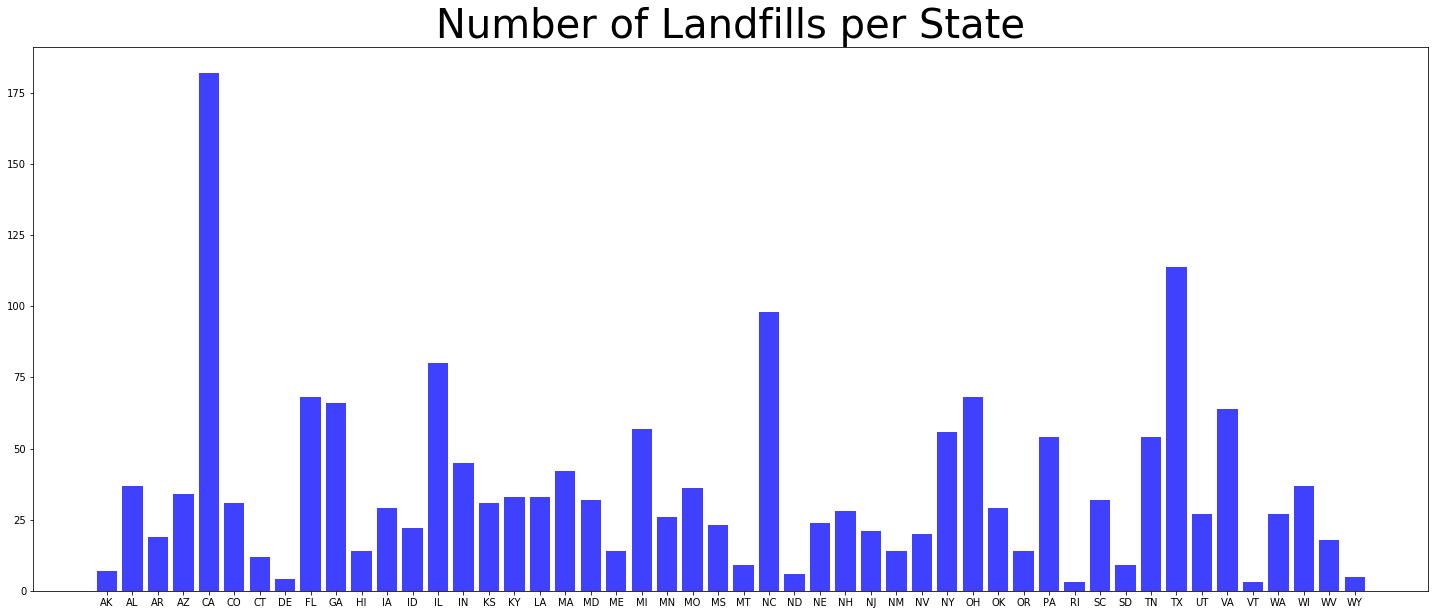

In [9]:
#Bar Graph showing number of Landfills per State
x_axis = np.arange(len(landfill_count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(25,10))
plt.bar(x_axis, landfill_count_df["Landfill Name"], color='b', alpha=0.75)
plt.xticks(tick_locations, list(landfill_count.index))
plt.title("Number of Landfills per State", fontsize=40)
plt.savefig("./LH_landfills_per_state.png")